In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

FILE_PATH = '/Users/annabelholmes1101/Desktop/full stack/NorthStarRisk-Bond-Yield/MyApp/bin/Debug/net9.0/'

In [8]:
expiry_path = FILE_PATH + "mse_days_to_expiry_unbinned.csv"
diff_path = FILE_PATH + "mse_diff_unbinned.csv"

expiry_df = pd.read_csv(expiry_path)
diff_df = pd.read_csv(diff_path)

In [9]:
expiry_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128800 entries, 0 to 3128799
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   DaysToExpiry      float64
 1   ErrorFirstOrder   float64
 2   ErrorEstimate     float64
 3   ErrorCustom       float64
 4   ErrorCouponYield  float64
 5   Error3            float64
 6   Error4            float64
 7   Error5            float64
 8   CouponYield       float64
 9   PaymentFrequency  object 
dtypes: float64(9), object(1)
memory usage: 238.7+ MB


In [10]:
cols = [
    'ErrorFirstOrder', 'ErrorEstimate',
    'ErrorCustom', 'ErrorCouponYield',
    'Error3', 'Error4', 'Error5'
]

expiry_grouped = (
    expiry_df
    .groupby('DaysToExpiry')[cols]
    .agg(lambda x: x.abs().max())
)


In [11]:
cols = [
    'ErrorFirstOrder', 'ErrorEstimate',
    'ErrorCustom', 'ErrorCouponYield',
    'Error3', 'Error4', 'Error5'
]

diff_grouped = (
    diff_df
    .groupby('CouponMinusYield')[cols]
    .agg(lambda x: x.abs().max())
)

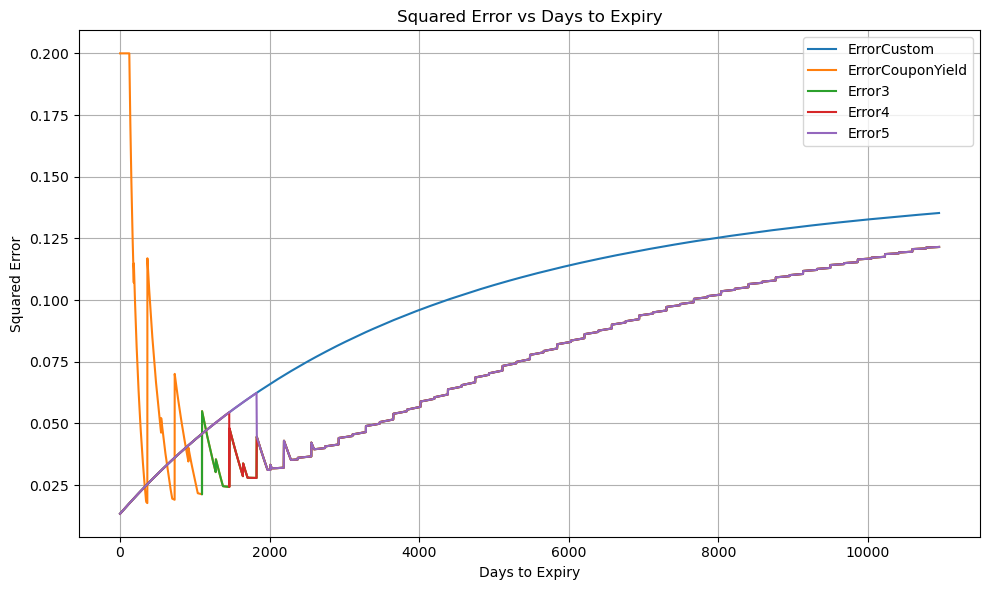

In [12]:
plt.figure(figsize=(10, 6))
error_list = ['ErrorCustom', 'ErrorCouponYield', 'Error3', 'Error4', 'Error5']

for err in error_list:
    plt.plot(expiry_grouped.index, expiry_grouped[err], label=err)

plt.xlabel("Days to Expiry")
plt.ylabel("Squared Error")
plt.title("Squared Error vs Days to Expiry")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

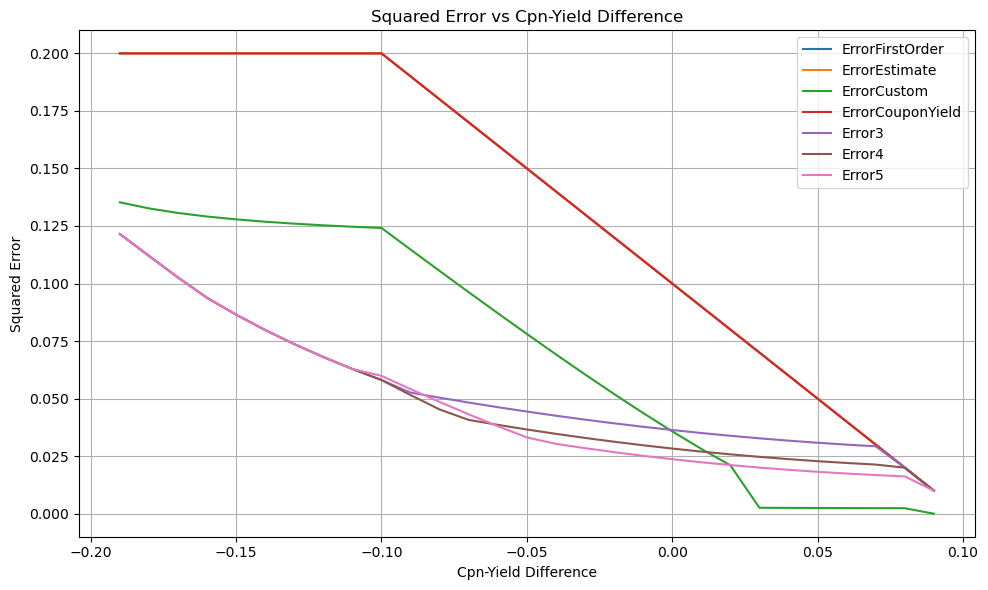

In [13]:
plt.figure(figsize=(10, 6))
error_list = ["ErrorFirstOrder", "ErrorEstimate", 'ErrorCustom', 'ErrorCouponYield', 'Error3', 'Error4', 'Error5']

for err in error_list:
    plt.plot(diff_grouped.index, diff_grouped[err], label=err)

plt.xlabel("Cpn-Yield Difference")
plt.ylabel("Squared Error")
plt.title("Squared Error vs Cpn-Yield Difference")

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
nr_convergence_path = FILE_PATH + 'nr_convergence.csv'
df = pd.read_csv(nr_convergence_path)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21901600 entries, 0 to 21901599
Data columns (total 12 columns):
 #   Column         Dtype  
---  ------         -----  
 0   BondIndex      int64  
 1   CouponRate     float64
 2   DaysToExpiry   int64  
 3   Frequency      object 
 4   Yield          float64
 5   Method         object 
 6   InitialYield   float64
 7   FinalYield     float64
 8   Iterations     int64  
 9   InitialTimeMs  float64
 10  NRTimeMs       float64
 11  TotalTimeMs    float64
dtypes: float64(7), int64(3), object(2)
memory usage: 2.0+ GB


In [47]:
sns.set(style='whitegrid')
df['Frequency'] = df['Frequency'].astype('category')
df['Method'] = df['Method'].astype('category')

In [61]:
def plot_smoothed_trend(df, x_var, y_var, title):
    df_grouped = df.groupby([x_var, 'Method'], as_index=False)[y_var].mean()
    
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=df_grouped,
        x=x_var,
        y=y_var,
        hue='Method',
        estimator=None,
        #marker='o',
        ci=None
    )
    plt.title(title, fontsize=15)
    plt.xlabel(x_var, fontsize=13)
    plt.ylabel(f'Average {y_var}', fontsize=13)
    plt.legend(title='Method', fontsize=10)
    plt.tight_layout()
    plt.show()

/var/folders/ms/8kphl0td21x1cj0svfxby05c0000gn/T/ipykernel_88361/108832335.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby([x_var, 'Method'], as_index=False)[y_var].mean()
/var/folders/ms/8kphl0td21x1cj0svfxby05c0000gn/T/ipykernel_88361/108832335.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


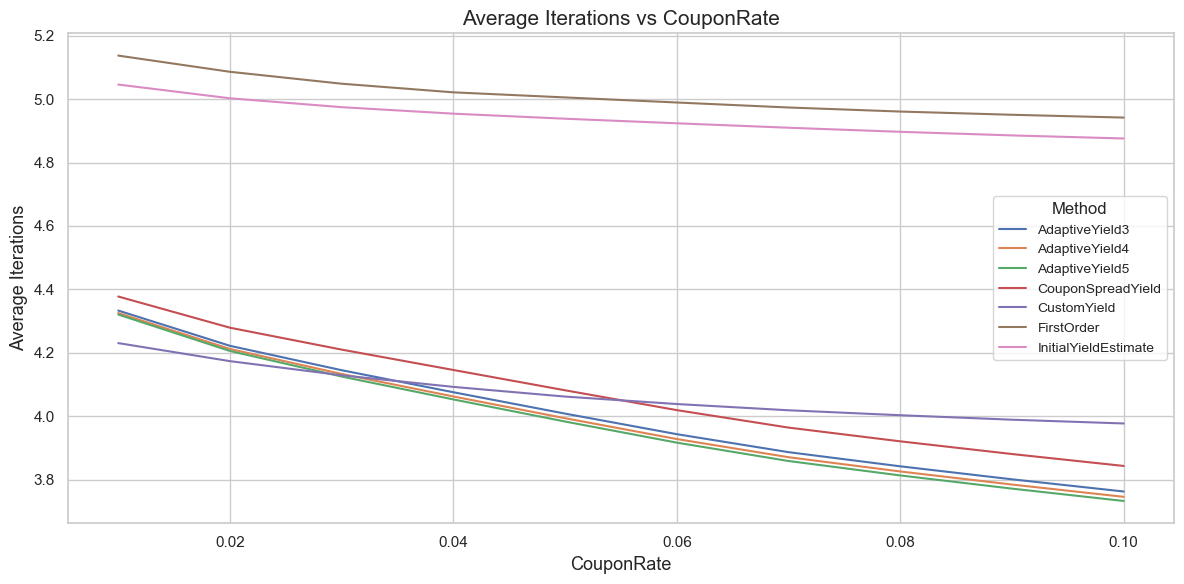

In [62]:
# CouponRate vs Iterations
plot_smoothed_trend(df, 'CouponRate', 'Iterations', 'Average Iterations vs CouponRate')

/var/folders/ms/8kphl0td21x1cj0svfxby05c0000gn/T/ipykernel_88361/108832335.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby([x_var, 'Method'], as_index=False)[y_var].mean()
/var/folders/ms/8kphl0td21x1cj0svfxby05c0000gn/T/ipykernel_88361/108832335.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


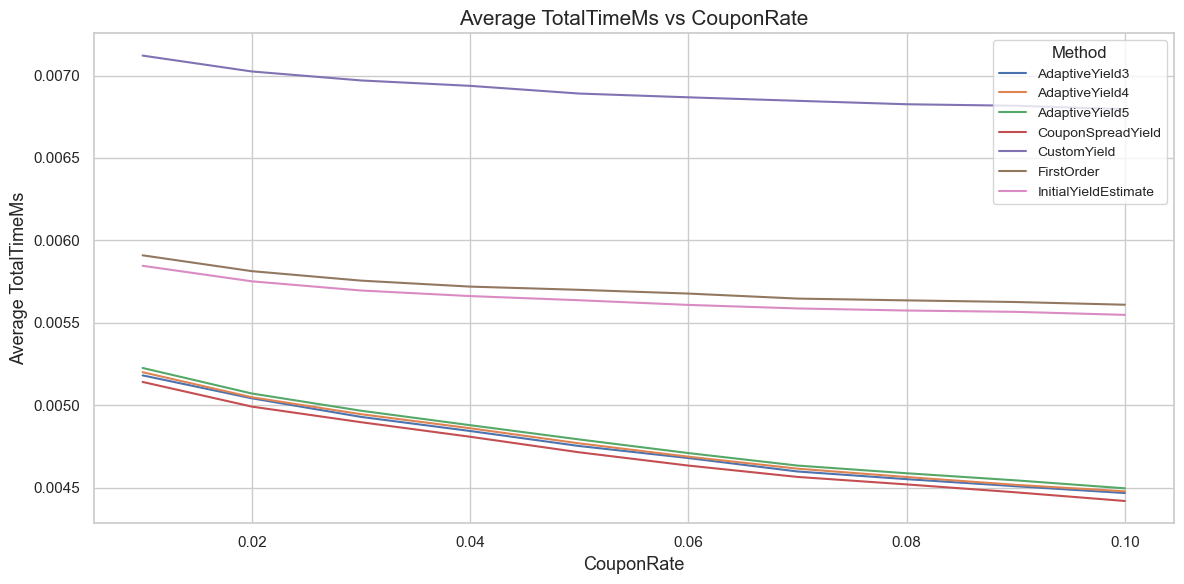

In [63]:
# CouponRate vs TotalTimeMs
plot_smoothed_trend(df, 'CouponRate', 'TotalTimeMs', 'Average TotalTimeMs vs CouponRate')

/var/folders/ms/8kphl0td21x1cj0svfxby05c0000gn/T/ipykernel_88361/921339494.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['DaysToExpiryBin', 'Method'], as_index=False)['TotalTimeMs'].mean()


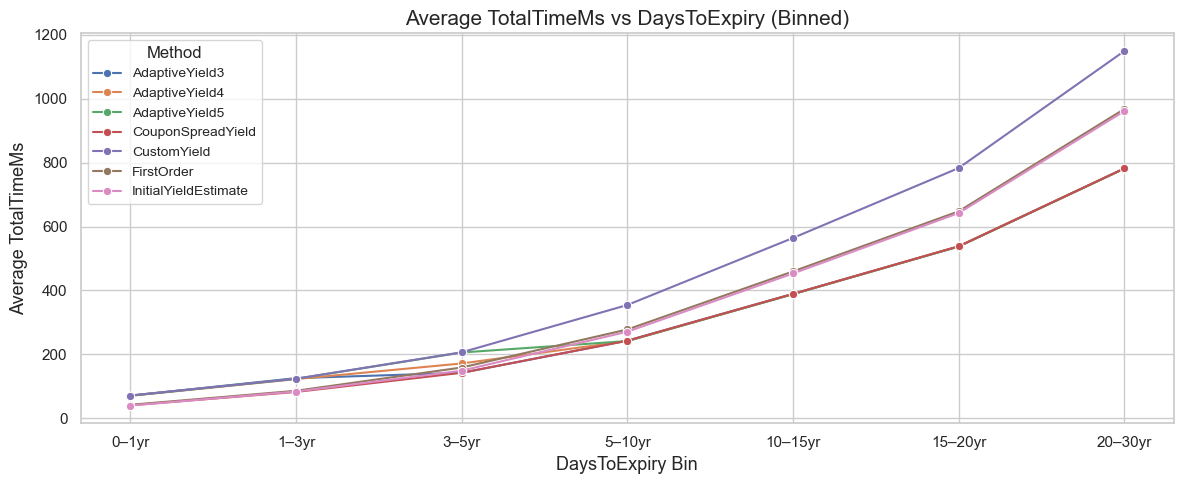

In [ ]:
# DaysToExpiry vs TotalTimeMs

# df['DaysToExpiry'].min() # 1
# df['DaysToExpiry'].min() # 10950

bins = [0, 365, 1095, 1825, 3650, 5475, 7300, 10950]
labels = ['0–1yr', '1–3yr', '3–5yr', '5–10yr', '10–15yr', '15–20yr', '20–30yr']

df['DaysToExpiryBin'] = pd.cut(df['DaysToExpiry'], bins=bins, labels=labels, include_lowest=True)

df_grouped = df.groupby(['DaysToExpiryBin', 'Method'], as_index=False)['TotalTimeMs'].mean() 

plt.figure(figsize=(12, 5))
sns.lineplot(
    data=df_grouped,
    x='DaysToExpiryBin',
    y='TotalTimeMs',
    hue='Method',
    marker='o',
    estimator=None
)

plt.title('Average TotalTimeMs vs DaysToExpiry (Binned)', fontsize=15)
plt.xlabel('DaysToExpiry Bin', fontsize=13)
plt.ylabel('Average TotalTimeMs', fontsize=13)
plt.legend(title='Method', fontsize=10)
plt.tight_layout()
plt.show()

df_grouped['TotalTimeMs'] == df_grouped['TotalTimeMs'].min()

/var/folders/ms/8kphl0td21x1cj0svfxby05c0000gn/T/ipykernel_88361/2945375816.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['DaysToExpiryBin', 'Method'], as_index=False)['Iterations'].mean()


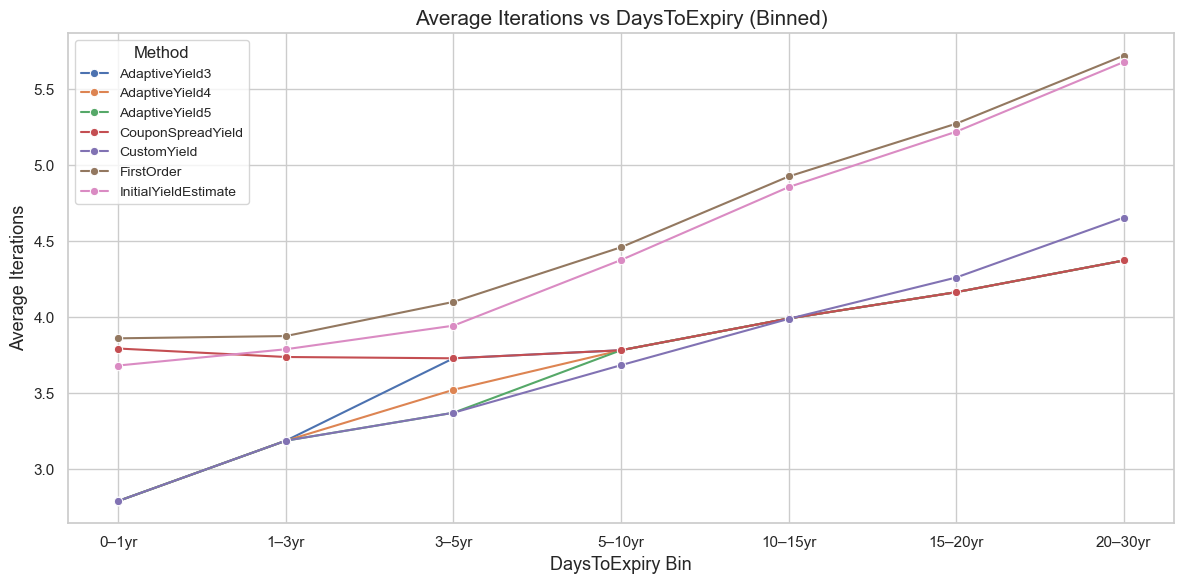

In [68]:
# DaysToExpiry vs Iterations

# df['DaysToExpiry'].min() # 1
# df['DaysToExpiry'].min() # 10950

bins = [0, 365, 1095, 1825, 3650, 5475, 7300, 10950]
labels = ['0–1yr', '1–3yr', '3–5yr', '5–10yr', '10–15yr', '15–20yr', '20–30yr']

df['DaysToExpiryBin'] = pd.cut(df['DaysToExpiry'], bins=bins, labels=labels, include_lowest=True)

df_grouped = df.groupby(['DaysToExpiryBin', 'Method'], as_index=False)['Iterations'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_grouped,
    x='DaysToExpiryBin',
    y='Iterations',
    hue='Method',
    marker='o',
    estimator=None
)

plt.title('Average Iterations vs DaysToExpiry (Binned)', fontsize=15)
plt.xlabel('DaysToExpiry Bin', fontsize=13)
plt.ylabel('Average Iterations', fontsize=13)
plt.legend(title='Method', fontsize=10)
plt.tight_layout()
plt.show()